# 0.1 Bibliotheken installieren und importieren

In [1]:
# Bibliothek installieren (auskommentieren)
#pip install pandas

In [2]:
# Bibliothek importieren
import pandas as pd
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [3]:
# Bibliothek installieren (auskommentieren falls nicht installiert)
#pip install numpy
# falls syntax error entsteht : nicht beachten!

In [4]:
# Bibliothek importieren
import numpy as np
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [5]:
# Bibliothek installieren (auskommentieren)
#pip install matplotlib
# falls syntax error entsteht : nicht beachten!

In [6]:
# Bibliothek importieren
import matplotlib.pyplot as plt
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [7]:
# Bibliothek installieren (auskommentieren)
#pip install tensorflow
# falls syntax error entsteht : nicht beachten!

In [8]:
# Bibliothek importieren
import tensorflow as tf
# Modelle aus tensorflow importieren
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout, Layer, DepthwiseConv2D
from tensorflow.keras.utils import to_categorical, plot_model
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [9]:
# Bibliothek installieren (auskommentieren)
#pip install sklearn
# falls syntax error entsteht : nicht beachten!

In [10]:
# Modelle aus Sklearn importieren
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

In [11]:
# Bibliothek installieren (auskommentieren)
#pip install tensorflow-datasets
# falls syntax error entsteht : nicht beachten!

In [12]:
# Bibliothek importieren
import tensorflow_datasets as tfds
# falls modul nicht geladen werden konnte, müssen 
# Sie prüfen ob die Bibliothek richtig installiert wurde

# 1. Business Understanding

#### Online-Versandhändler haben oft eine hohe Rückläuferquote. Diese Rückläuferquote kommt zum Beispiel durch den Kauf von Artikeln in verschiedenen Größen zustande. Die nicht passenden Größen werden dann vom Käufer wieder zurückgesendet. Unter diese Versandhändler fällt, mit einer Rückläuferquote von bis zu 50%, auch das Unternehmen Zalando. Dabei müssen 97% der zurückgesendeten Produkte wieder eingelagert und verkauft werden. Für den erneuten Verkauf werden die Produkte, in diesem Betrachtungsfall Klamotten, identifiziert, gelabelt und bei Bedarf wieder eingelagert. Das Unternehmen Zalando verschickte im Jahr 2019 rund 186 Millionen Bestellungen. Wenn man davon ausgeht, dass eine Bestellung 4 Artikel beinhaltet und 50% der Bestellungen wieder zurückgesendet werden, ergibt das 372 Millionen Artikel, die wieder neu gelabelt und eingelagert werden müssen.

#### Die Unterstützung und Optimierung der Rückläuferbearbeitung, kann zum Beispiel durch eine AI gestützte Klassifikation gewährleistet werden. Mit diesem Ansatz kann dann die zu einem Artikel zugehörige Kategorie, auf Basis von Bildern, bestimmt werden. Damit ergibt sich die Frage- bzw. Problemstellung, inwiefern können Machine Learning Algorithmen bei der Klassifizierung von Bildern einzelner Kleidungsstücke unterstützen?

# 2. Data Understanding

## 2.1 Daten lesen

In [13]:
# Pfade der Trainingsdaten und Testdaten
csv_file_train = "../data/fashion-mnist_train.csv"
csv_file_test = "../data/fashion-mnist_test.csv"

# lesen der CSV-Datei mit panda Bibliothek
df_train = pd.read_csv(csv_file_train) 
df_test = pd.read_csv(csv_file_test)
# unterteilt in (dataframe = df)_training und test

# erstelle Kopien
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()


## 2.2 Daten Analyse

In [14]:
# Trainingsdaten beschreiben
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [15]:
# testdaten beschreiben
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


#### Der für diese Arbeit gewählte Datensatz heißt Fashion MNIST und wurde im Jahr 2017 von dem Unternehmen Zalando veröffentlicht. Der Datensatz steht in einer GitHub Repository zur Verfügung und ist frei zugänglich. 

#### Er beinhaltet Zalando-Artikelbilder, die in zwei Datensätze aufgeteilt sind. Der erste Satz (df_train) enthält 60.000 Beispiele, die für das Training verwendet werden und der zweite Satz (df_test) 10.000 Beispiele, die für das Testen verwendet werden. 

#### Jedes Beispiel, welches jeweils ein Bild darstellt, ist ein 28x28 Graustufenbild. Jedem Bild wird dabei noch ein Label zugeordnet.

In [16]:
# alle Spalten (Attribute)

print(df_train.head())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

#### Ein Label repräsentiert eins der 10 Klassen, wobei jede Klasse eine Artikelkategorie darstellt. 

In [17]:
# diese 10 Klassen definieren wir im Array
klassen_name = ['Top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

#### In der folgenden Abbildung ist eine Übersicht des Datensatzes bzw. der Bilder zu sehen. Dabei werden pro Klasse zwei Zeilen beansprucht.

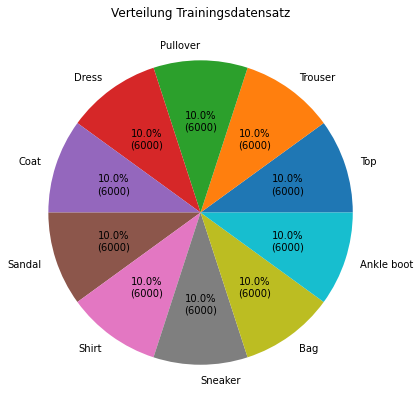

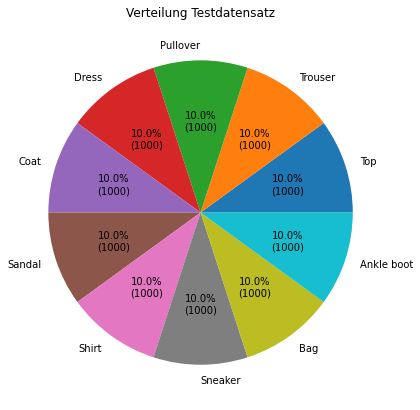

In [18]:
# function zur Erstellung der Labelnamen im Diagramm
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

def plot_pie(title, data):
    # plot erstellen
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.pie(data, autopct = lambda pct: func(pct, data), labels = klassen_name)
    ax.set_title(title)
    # plot anzeigen
    plt.show()

# plote die Trainingdaten 
plot_pie("Verteilung Trainingsdatensatz", df_train["label"].value_counts())
# plote die Testdaten
plot_pie("Verteilung Testdatensatz", df_test["label"].value_counts())

#### Der Trainings- als auch der Testdatensatz ist ziemlich ausgeglichen. In jedem Satz ist jede Kategorie mit ca. 10% vertreten, was in den nächsten Abbildungen zu sehen ist. Aufgrund der Ausgeglichenheit der Daten müssen im Rahmen der Data Preparation keine großen Änderungen oder Vorbereitungen vorgenommen werden.

<Figure size 720x720 with 0 Axes>

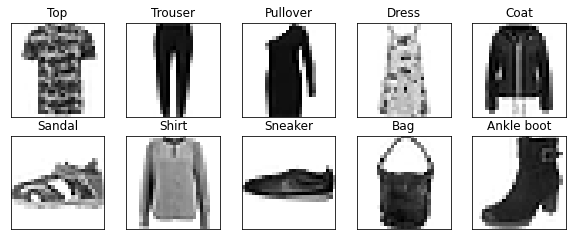

In [19]:
# ploten der einzelnen Klassen als Bild
# plot Größe definieren 
plt.figure(figsize=(10,10))
# trenne Label von restlichen Attributen
# um die Zielvariable von dem Datensatzen zu entfernen

# Trainingsdatensatz wird in zwei Datensätze geteilt
# eines der Datensätze beinhaltet die Label(klassen) Werte (Zielvariable)
y_train = df_train.pop('label').to_numpy()
# der andere Datensatz beinhaltet  (28x28=784) die Pixel Werte
x_train = df_train.to_numpy()

# ein Beispiel des Datensatz anhand eines Bild zeigen
image = x_train[0].reshape((28,28)) / 255.0

# groeße der figure definieren
plt.figure(figsize=(10,10))

tempI = 0
for index in range(len(x_train)):
    klasse = y_train[index]
    img = x_train[index] / 255.0
    if klasse == tempI:
        img = img.reshape((28,28))
        plt.subplot(5,5,tempI+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        plt.title(klassen_name[klasse])
        tempI += 1
    if tempI == 10:
        break
plt.show()

#### Jedes der oben abegbildeten Elemente stellen eine Klasse (Label) da. Jede einzelne Zeile aus dem Datensatz stellt eine dieser Klassen dar, diese können jedoch untereinander varieren. Dazu sehen wir ein weiteres Beispiel aus dem Datensatz, das zu Klasse Ankle Boot gehört.

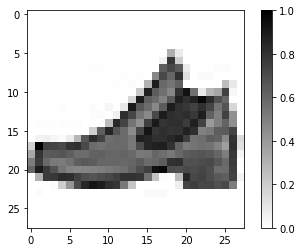

In [20]:
# aus den Trainingsdaten holen wir ein weiteres Beispiel zur Klasse Ankle Boot aus dem index 1
# und formen die Pixel angaben um.
image = x_train[1].reshape((28,28)) / 255.0

# plot erstellen
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
# plot anzeigen
plt.show()

# 3. Data preperation

## 3.1. Definiere Test-, Training- und Validierungsdaten

In [21]:
#Validierungsdaten Trainsplit
df_train, df_val = train_test_split(df_train_copy, test_size=0.1, random_state=0)

# zunächst definieren wir unsere Trainingsdaten aus den Trainingsplit
y_train = df_train.pop('label').to_numpy() # Zielvariable
x_train = df_train.to_numpy() # Pixelwerte

# Validierungsdaten definieren
y_val = df_val.pop('label').to_numpy() # Zielvariable
x_val = df_val.to_numpy() # Pixelwerte

# als nächstes definieren wir unsere Testdaten
y_test = df_test_copy.pop('label').to_numpy()
x_test = df_test_copy.to_numpy()

print(f"{len(df_train)} train examples")
print(f"{len(df_val)} validation examples")
print(f"{len(df_test)} test examples")

54000 train examples
6000 validation examples
10000 test examples


## 3.2. Merkmalsskaliereung (feature-scaling)

In [22]:
# Normalisierung der Trainingsdaten

# da wir wissen, es handelt sich hierbei um Graustufen 
# die zwischen 0 bis 255 sein können
x_train = x_train / 255.0 

# Normalisierung der Validierungsdaten
x_val = x_val / 255.0

# Normalisierung der Testdaten
x_test = x_test / 255.0

#### Da die Pixeln ein Wert zwischen 0 bis 255 sein können, teilen wir diese Werte durch 255 um eine Zahl zwischen 0 bis 1 daraus zu machen. (Normalisierung)

In [23]:
# Nun probieren wir die 784 Pixlen Angaben auf 28x28 Pixlen umzuformen
# dazu definierein wir erstmal die Zeilen und Spalten
imgRow = 28
imgCol = 28
# die Umformung definieren
imgUmformen = (imgRow, imgCol, 1)

# Umformen der 784 Spalten zu 28 Zeilen und 28 Spalten (28x28)
x_train = x_train.reshape(x_train.shape[0], * imgUmformen)
x_test = x_test.reshape(x_test.shape[0], * imgUmformen)
x_val = x_val.reshape(x_val.shape[0], * imgUmformen)

#### Als nächstes formen wir unsere Zielvariabel (y_train, y_test) zu einer Kategorischen Matrix.

In [24]:
# hierzu verwenden wir den Bibliotheken tensorflow das modul tensorflow.keras.utils
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

#### Zur Kontrolle lassen wir die Dimension des Datensatzes anzeigen.

In [25]:
print("X_TRAIN: " , x_train.shape)
print("X_VAL: " , x_val.shape)
print("X_TEST: " , x_test.shape)
print("Y_TRAIN: " , y_train.shape)
print("Y_VAL: " , y_val.shape)
print("Y_TEST: " , y_test.shape)

X_TRAIN:  (54000, 28, 28, 1)
X_VAL:  (6000, 28, 28, 1)
X_TEST:  (10000, 28, 28, 1)
Y_TRAIN:  (54000, 10)
Y_VAL:  (6000, 10)
Y_TEST:  (10000, 10)


#### Die Daten sind soweit vorbereitet, dass wir unseren ersten Anlauf nehmen können.

# 4.Modellierung

#### In diesem Schritt wird ein Maschinelles Lernalgorithmus erstellt und trainiert. Die Optimierung dieses Modelles findet in einer bestimmten Reihenfolge statt. Zunächst wird ein Modell erstellt, welches trainiert wird und mit den Validierungsdaten bewertet wird. Als nächstes Springt man zur 5. Evaluationsphase und testet das Modell. Durch das Testen wird es möglich die neu implementierten Modelle mit dem alten Modell zu vergleichen. Ist man mit den Ergebnissen nicht zufrieden oder das Zielergebniss wurde nicht erreicht, so springt man zur Phase 4. Modellierung zurück und versucht das Modell zu optimieren. Sollten die Zielergebnisse erreicht werden, so geht es mit dem Schritt Deployment weiter.

# 4.1 Experiment 1

#### Wir erstellen zunächst ein ganz einfaches CNN-Model. Dazu definieren wir unsere Layer wie in der Ausarbeitung beschrieben wurde.

    Convolutional Layer     = Conv2D
    --------------------------------------
    Pooling Layer           = MaxPooling2D
    --------------------------------------
    Fully-Connected Layer   = Dense
    --------------------------------------



#### Zunächst nur mit einen Convolutional Layer und einen Pooling Layer:

In [ ]:
# Das modell initalizieren
model_1 = Sequential()
#Modellierungsstep 1:
# fügen der 1. Feature-Extraktor mit input 28x28 dazu
model_1.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1))) #(Feature-Extraktor)
# fügen der Pooling Layer dazu
model_1.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
# fügen der 2. Feature-Extraktor mit input 28x28 dazu
model_1.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(14, 14,1))) #(Feature-Extraktor) (Merkmale extrahieren)
# fügen der Pooling Layer dazu
model_1.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
# flatten=Faltung (fasst die mehrdimensionale Matrix in eine Liste zusammen) (nötig für Kompatibilibitaet) (zusammenfassung der extrahierten Merkmale)
model_1.add(Flatten())
# und der fully-connected layer
model_1.add(Dense(units=28, activation='relu'))
model_1.add(Dense(units=10, activation='softmax'))
# schließ das Modell
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 28)                4

#### Setze die Kompilier Einstellungen des Models. Darunter

    -den Optimiere als Adam, welches das Gradientenabstiegsverfahren beschreibt,
    -die Verlustfunktion als Cross-Entropy-Loss Funktion, welches für die Mehrklassen Klassifikation genutzt wird,
    -die Bewertungsmetriken des Modells als Genauigkeit. Die anderen Bewertungsmetriken wie z. B. Präzision oder Trefferquote werden durch andere Module aus Tensorflow berechnet. Dieses Bewertungen finden nachdem Testing schritt statt.

In [ ]:
# Modell compilen 
model_1.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    # setze die loss function = Categorical crossentropy
    loss= tf.keras.losses.categorical_crossentropy, 
    # setzte die metric genauigkeit
    metrics=['accuracy']
)

In [ ]:
# Epoche Anzahl definieren 10
NUM_EPOCHS = 10
# Batchgroeße definieren 
BATCH_SIZE = 64

# Trainingsphase starten
history = model_1.fit(
    # Trainingsdaten, Attribute
    x_train,
    # Trainingsdaten, Zielvariabel
    y_train,
    # Batchgroeße
    batch_size=BATCH_SIZE,
    # Epochenanzahl
    epochs=NUM_EPOCHS,
    # Validierungsdaten
    validation_data=(x_val, y_val), 
    # anzahl Validierungssschritte
    validation_steps=10,
)

Epoch 1/10
844/844 [==============================] - 17s 20ms/step - loss: 0.5194 - accuracy: 0.8144 - val_loss: 0.3874 - val_accuracy: 0.8656
Epoch 2/10
844/844 [==============================] - 17s 20ms/step - loss: 0.3344 - accuracy: 0.8802 - val_loss: 0.3154 - val_accuracy: 0.8813
Epoch 3/10
844/844 [==============================] - 17s 20ms/step - loss: 0.2968 - accuracy: 0.8934 - val_loss: 0.3070 - val_accuracy: 0.8797
Epoch 4/10
844/844 [==============================] - 17s 20ms/step - loss: 0.2709 - accuracy: 0.9025 - val_loss: 0.3085 - val_accuracy: 0.8906
Epoch 5/10
844/844 [==============================] - 17s 20ms/step - loss: 0.2520 - accuracy: 0.9087 - val_loss: 0.2713 - val_accuracy: 0.9031
Epoch 6/10
844/844 [==============================] - 17s 21ms/step - loss: 0.2310 - accuracy: 0.9156 - val_loss: 0.2803 - val_accuracy: 0.9031
Epoch 7/10
844/844 [==============================] - 17s 20ms/step - loss: 0.2159 - accuracy: 0.9211 - val_loss: 0.3079 - val_accuracy:

#### Nun wird oben jede einzelne Epochenergebnisse angezeigt. Die Ergebnisse zeigen, das die erste Epoche eine Genauigkeit von 81,44% hat und die sich bei den nächste Epochen erhöht. Damit hat das Model am ende der Trainingsphase eine Genauigkeit von 91%. Sichtbar ist die differenz zwischen accuracy (93,34%) und val_accuracy (91,14%). Die accuracy (genauigkeit) beschreibt in diesem Fall, die Genauigkeit der Traingsdaten, diese wird jedoch nicht für die bewertung genutzt. Die val_accurac, welches die Genauigkeit der Validierungsdaten anzeigt wird hier in betracht gezogen, da diese zu validierung des Models ersellt worden ist und komplet abgekapselt von den Trainingsdaten übergeben wurde. Der nächste Schritt zu optimierung des Modells, sollte die anpassung sein, welches den Abstand der Genaugikeiten verringert.

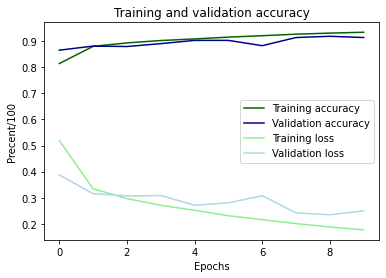

<Figure size 432x288 with 0 Axes>

In [ ]:
# Genauigkeiten der Trainingsdaten und Validierungsdaten
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# Loss (Verlust/Kosten) der Trainingsdaten und Validierungsdaten
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# Plotten
epochs = range(len(acc))
plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()
plt.show()

#### In dem oberen Abbild ist es leichter zu sehen, wie die Trainingsdaten und die Validierungsdaten abschneiden. Das Modell verbessert sich, jedoch ist auch ersichtlich, dass von Epoche zu Epoche Sprünge existieren. Mit den Bewertungsmetriken der Trainingsphase und dem Graphen wird es deutlicher, dass in diesem Modell eine Überanpassung stattfindet. Zünachst sollte die Evaluation des Modells erfolgen, womit der Vergleich zwischen dem geänderten Modell und dem aktuellen Modell ermöglicht wird.

#### Nun geht es weiter mit dem Punkt __5.1__ __Evaluation__ des ersten Modells.

# 4.2 Experiment 2

#### Wir entfernen die zweite Feature Extraktion und fügen einen Dropout Schicht hinzu. Durch die Dropout Schicht ist es möglich die Überanpassung bei einem Modell zu verhindern.

    -Dropout mit 0.45 Rate wurde hinzugefügt, damit eine Überanpassung verhindert werden kann


In [ ]:
# Das Modell initalizieren
model_2 = Sequential()
# Modellierungsstep 1:
# fügen den 1. Feature-Extraktor mit Input 28x28 Pixeln dazu
model_2.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1))) #(Feature-Extraktor)
# fügen den Pooling Layer dazu
model_2.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
# fügen den 2. Feature-Extraktor mit Input 28x28 Pixeln dazu
model_2.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(14, 14,1))) #(Feature-Extraktor) (Merkmale extrahieren)
# fügen den Pooling Layer dazu
model_2.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
#dropout 
model_2.add(Dropout(0.45, input_shape=(7,7)))
# flatten=Faltung (fasst die mehrdimensionale Matrix in eine Liste zusammen) (noetig für kompatibilibität)
model_2.add(Flatten())
# und den fully-connected layer

model_2.add(Dense(units=28, activation='relu'))
model_2.add(Dense(units=10, activation='softmax'))
# schließ das Modell
model_2.summary()
# Modell compilen 
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    # setzen die Loss/Verlust Function = Categorical CrossEntropy
    loss= tf.keras.losses.categorical_crossentropy, 
    # setzten die Metrik Genauigkeit
    metrics=['accuracy']
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1568)             

#### Insgesamt hat das Modell 53.790 Parameter, die trainiert werden können.

In [ ]:
# Epocheanzahl definieren
NUM_EPOCHS = 10
# Batchgroeße definieren 
BATCH_SIZE = 64

# Trainingsphase starten
history = model_2.fit(
    # Trainingsdaten, Attribute
    x_train,
    # Trainingsdaten, Zielvariabel
    y_train,
    # Batchgroeße
    batch_size=BATCH_SIZE,
    # Epochenanzahl
    epochs=NUM_EPOCHS,
    # Validierungsdaten
    validation_data=(x_val, y_val), 
    # Validierungsschritte
    validation_steps=10,
)

Epoch 1/10
844/844 [==============================] - 18s 21ms/step - loss: 0.5884 - accuracy: 0.7867 - val_loss: 0.3718 - val_accuracy: 0.8656
Epoch 2/10
844/844 [==============================] - 17s 20ms/step - loss: 0.3927 - accuracy: 0.8580 - val_loss: 0.3423 - val_accuracy: 0.8797
Epoch 3/10
844/844 [==============================] - 17s 21ms/step - loss: 0.3504 - accuracy: 0.8738 - val_loss: 0.3059 - val_accuracy: 0.8875
Epoch 4/10
844/844 [==============================] - 17s 20ms/step - loss: 0.3209 - accuracy: 0.8843 - val_loss: 0.2815 - val_accuracy: 0.8859
Epoch 5/10
844/844 [==============================] - 17s 20ms/step - loss: 0.3049 - accuracy: 0.8896 - val_loss: 0.2831 - val_accuracy: 0.8906
Epoch 6/10
844/844 [==============================] - 18s 21ms/step - loss: 0.2875 - accuracy: 0.8945 - val_loss: 0.2579 - val_accuracy: 0.9094
Epoch 7/10
844/844 [==============================] - 17s 21ms/step - loss: 0.2774 - accuracy: 0.8993 - val_loss: 0.2722 - val_accuracy:

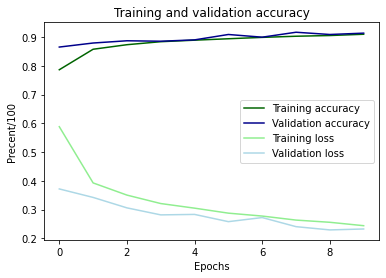

<Figure size 432x288 with 0 Axes>

In [ ]:
# Genauigkeiten der Trainingsdaten und Validierungsdaten
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# Loss (Verlust/Kosten) der Trainingsdaten und Validierungsdaten
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# plotten
epochs = range(len(acc))
plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()
plt.show()

#### Im diesem Schritt wurde das Modell so optimiert, dass die Überanpassung verhindert werden kann. Durch den Graphen stellen wir fest, dass die Genaugikeiten der Validierungs- und Trainingsdaten kovergieren. Dir Sprünge großen sprunge im Graphen wurden genauso beseitigt. Dazu ist die differenz der Genauigkeiten von 2% auf 0.38% gesunken. Als nächstes wird das Modell mit dem Testdaten getestet, welches im Kapitel 5.2 Evaluation des zweiten Modells erarbeitet wurde.

# 4.3 Experiment 3

#### Bisher wurde das Modell so optimiert, dass es genauere Lösugen liefern kann, ohne dass die Manipulationen durch Datensätze entstehen kann. In diesem Schritt versuchen wir das Modell weiter zu optimieren, damit es Richtig bzw. besser Prognosen liefern kann. Dazu fügen wir dem Modell einige Schichten hinzu.

    - Verdoppeln die Conv2D Schicht in jedem Feature-Extrakor, um mehrere Merkmale aus den Daten, extrahieren zu können.
    - Ändern dir Dropout Rate auf 0.28 was 28% entspricht, da aufgrund der verdoppelung der Conv2D Schichten mehrere Daten doppelt auftretten können. Damit das verhindert werden kann wird die rate reduziert.
    - Ändern die Größe der Fully-Connected-Layer, da es durch die doppelte Conv2D Schicht mehrere Merkmale extrahiert werden und dies dementsprechend zugeordnet werden muss.


In [39]:
# 3. Model
# Das Modell initalizieren
model_3 = {}
model_3 = Sequential()
# Modellierungsstep 1:
# fuegen den 1. Feature-Extraktor mit Input 28x28 Pixel dazu
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1))) #(Feature-Extraktor)
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(28, 28,1))) #(Feature-Extraktor)
# fuegen den Pooling Layer dazu
model_3.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
# fuegen den 2. Feature-Extraktor mit Input 14x14 Pixel dazu
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(14, 14,1))) #(Feature-Extraktor)
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(14, 14,1))) #(Feature-Extraktor)
# fuegen den Pooling Layer dazu
model_3.add(MaxPooling2D(pool_size=(2, 2))) #(Feature-Extraktor)
# fuegen den 3. Feature-Extraktor mit Input 7x7 Pixlen dazu
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(7, 7,1))) #(Feature-Extraktor)
model_3.add(Conv2D(filters=32,kernel_size=3, activation='relu', padding='same', input_shape=(7, 7,1))) #(Feature-Extraktor)
# dropout mit rate damit overfitting verhindert werden kann
model_3.add(Dropout(0.30))
# flatten=Faltung (fasst die mehrdimensionale Matrix in eine Liste zusammen) (noetig für kompatibilibität)
model_3.add(Flatten())
# und den Fully-Connected layer
model_3.add(Dense(units=784, activation='relu', use_bias=True))
model_3.add(Dense(units=10, activation='softmax'))
# schließ das Modell
model_3.summary()
# Modell compilen 
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    # setze die Loss/Verlust Function = Categorical CrossEntropy
    loss= tf.keras.losses.categorical_crossentropy, 
    # setzte die Metrik Genauigkeit
    metrics=['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                    

In [40]:
# Epocheanzahl definieren
NUM_EPOCHS = 10
# Batchgroeße definieren 
BATCH_SIZE = 64

# Trainingsphase starten
history = model_3.fit(
    # Trainingsdaten, Attribute
    x_train,
    # Trainingsdaten, Zielvariabel
    y_train,
    # Batchgroeße
    batch_size=BATCH_SIZE,
    # Epochenanzahl
    epochs=NUM_EPOCHS,
    # Validierungsdaten
    validation_data=(x_val, y_val), 
    #Validierungsschritte
    validation_steps=10,
)

Epoch 1/10
844/844 [==============================] - 57s 67ms/step - loss: 0.4710 - accuracy: 0.8282 - val_loss: 0.3221 - val_accuracy: 0.8844
Epoch 2/10
844/844 [==============================] - 56s 67ms/step - loss: 0.2873 - accuracy: 0.8951 - val_loss: 0.2612 - val_accuracy: 0.9031
Epoch 3/10
844/844 [==============================] - 56s 66ms/step - loss: 0.2445 - accuracy: 0.9092 - val_loss: 0.2069 - val_accuracy: 0.9312
Epoch 4/10
844/844 [==============================] - 56s 67ms/step - loss: 0.2136 - accuracy: 0.9221 - val_loss: 0.1729 - val_accuracy: 0.9328
Epoch 5/10
844/844 [==============================] - 56s 66ms/step - loss: 0.1927 - accuracy: 0.9285 - val_loss: 0.1999 - val_accuracy: 0.9312
Epoch 6/10
844/844 [==============================] - 55s 65ms/step - loss: 0.1760 - accuracy: 0.9335 - val_loss: 0.1820 - val_accuracy: 0.9375
Epoch 7/10
844/844 [==============================] - 56s 66ms/step - loss: 0.1585 - accuracy: 0.9405 - val_loss: 0.1713 - val_accuracy:

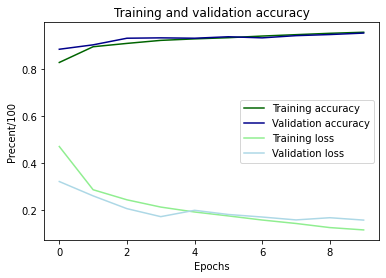

<Figure size 432x288 with 0 Axes>

In [41]:
# Genauigkeiten der Trainingsdaten und Validierungsdaten
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
# Loss (Verlust/Kosten) der Trainingsdaten und Validierungsdaten
loss = history.history["loss"]
val_loss = history.history["val_loss"]

# plotten
epochs = range(len(acc))
plt.plot(epochs, acc, "darkgreen", label="Training accuracy")
plt.plot(epochs, val_acc, "darkblue", label="Validation accuracy")
plt.plot(epochs, loss, "lightgreen", label="Training loss")
plt.plot(epochs, val_loss, "lightblue", label="Validation loss")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Precent/100")
plt.legend(loc=0)
plt.figure()
plt.show()

# 5. Evaluation

<h2 id="ev1">5.1 erstes Modell<h2>

#### Das Model (Experiment 1) wurde bisher trainiert und verbessert. Somit sollte das Model soweit sein, um mit den Testdaten einen Päzision von 91% zu erreicht.

In [ ]:
# Das Modell testen (return (Testdaten)) 
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=0)
# alle Klassen trennen und die Ergebnisse zu jeder Klasse anzeigen lassen
predicted_classes = (model_1.predict(x_test) > 0.5).astype("int32")
print("Durchschnittliche Verlust (loss, %): " , test_loss*100) 
print("Durchschnittliche Genauigkeit (accuracy, %): ", test_accuracy*100)
print(classification_report(y_test, predicted_classes, target_names=klassen_name,  zero_division=1))

loss Durchschnitt:  0.23172727227210999
Praezision Durchschnitt:  0.9196000099182129
              precision    recall  f1-score   support

         Top       0.85      0.87      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.92      0.84      0.88      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.86      0.92      0.89      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.83      0.69      0.75      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.98      0.96      0.97      1000

   micro avg       0.93      0.91      0.92     10000
   macro avg       0.93      0.91      0.92     10000
weighted avg       0.93      0.91      0.92     10000
 samples avg       0.93      0.91      0.91     10000



## 5.2 zweites Modell

In [ ]:
# Das Modell testen (return (Testdaten)) 
test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=0)
print("Durchschnittliche Verlust (loss, %): " , test_loss*100) 
print("Durchschnittliche Genauigkeit (accuracy, %): ", test_accuracy*100)
# alle Klassen trennen und die ergebnisse zu jeder Klasse anzeigen lassen
predicted_classes = (model_2.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predicted_classes, target_names=klassen_name,  zero_division=1))

loss:  0.22514380514621735
Praezision:  0.9158999919891357
              precision    recall  f1-score   support

         Top       0.85      0.87      0.86      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.91      0.85      0.88      1000
       Dress       0.95      0.90      0.93      1000
        Coat       0.89      0.84      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.81      0.70      0.75      1000
     Sneaker       0.96      0.96      0.96      1000
         Bag       0.99      0.98      0.98      1000
  Ankle boot       0.95      0.97      0.96      1000

   micro avg       0.93      0.90      0.92     10000
   macro avg       0.93      0.90      0.92     10000
weighted avg       0.93      0.90      0.92     10000
 samples avg       0.93      0.90      0.90     10000



#### Zu letzt betrachten wir die Ergebisse der einzelnen Klassen. Das Modell liefert schlechte Ergebnisse bei der Prognose von Coat 89% und Shirt 77%, aber gute Ergebnisse bei allen anderen Klassen (91% - 99%). Wir versuchen die Klassen die schlecht abschneiden zu verbessern indem wieder zum Schritt 4 zurückgehen. Hierzu springen wird zum Kapitel __4.3.__ __Experiment__ __3__.

## 5.3 drittes Modell

In [42]:
# Das Modell testen (return (Evaluationsdaten)) 
test_loss, test_accuracy = model_3.evaluate(x_test, y_test, verbose=0)
print("Durchschnittliche Verlust (loss, %): " , test_loss*100) 
print("Durchschnittliche Genauigkeit (accuracy, %): ", test_accuracy*100)
# alle Klassen trennen und die Ergsbnisse zu jeder Klasse anzeigen lassen
predicted_classes = (model_3.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, predicted_classes, target_names=klassen_name,  zero_division=1))

Durchschnittliche Verlust (loss, %):  20.993126928806305
Durchschnittliche Genauigkeit (accuracy, %):  92.75000095367432
              precision    recall  f1-score   support

         Top       0.87      0.88      0.87      1000
     Trouser       1.00      0.99      0.99      1000
    Pullover       0.92      0.87      0.90      1000
       Dress       0.94      0.93      0.93      1000
        Coat       0.88      0.91      0.89      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.83      0.78      0.80      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.94      0.98      0.96      1000

   micro avg       0.93      0.92      0.93     10000
   macro avg       0.93      0.92      0.93     10000
weighted avg       0.93      0.92      0.93     10000
 samples avg       0.93      0.92      0.92     10000



Nun erreicht das Modell aus dem Experiment 3 eine Leistung von 92.75% Genauigkeit und erzielt bei den Klassen Coat, Pullover und Shirt insgesamt eine besser Leistung.